In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_data = pd.read_csv('/content/amazon_delivery.csv')

In [5]:
df_data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [6]:
df_data.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [7]:
df_data.shape

(43739, 16)

In [8]:
df_data.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [11]:
df_data.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [12]:
df_data['Vehicle'].value_counts()

,count
Vehicle,
motorcycle,25527
scooter,14639
van,3558
bicycle,15


In [46]:
for col in df_data.select_dtypes(include='object').columns:
  df_data[col] = pd.to_numeric(df_data[col], errors='coerce')


In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


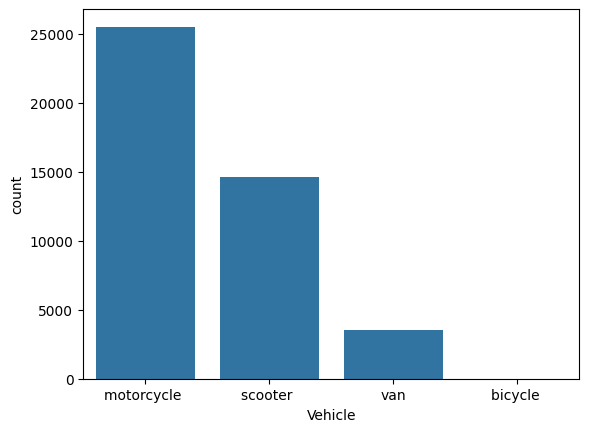

In [15]:
sns.countplot(x='Vehicle', data=df_data)
plt.show()

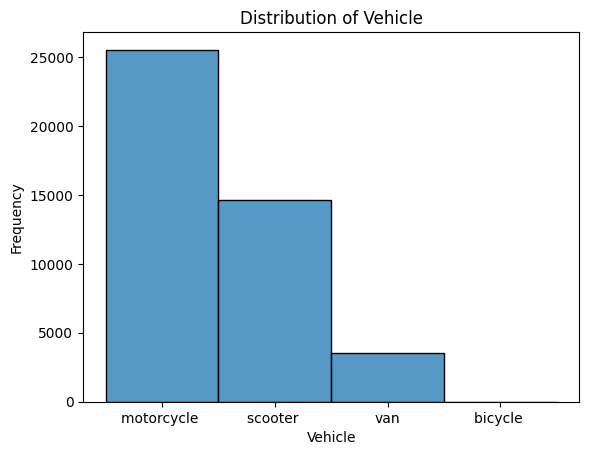

In [16]:
 sns.histplot(data=df_data, x='Vehicle')
 plt.title('Distribution of Vehicle')
 plt.xlabel('Vehicle')
 plt.ylabel('Frequency')
 plt.show()

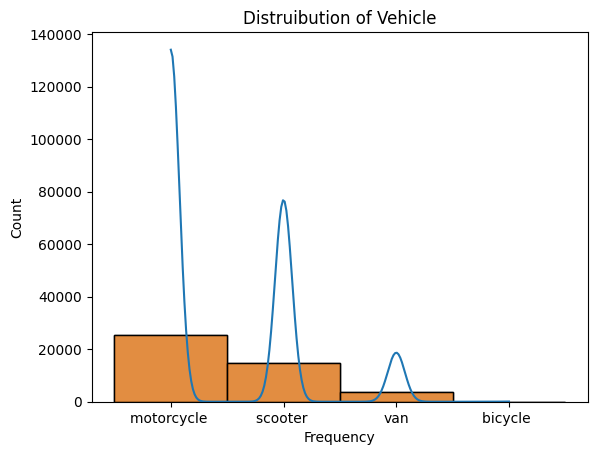

In [25]:
sns.histplot(data=df_data, x='Vehicle',kde=True)
sns.histplot(data=df_data, x='Vehicle')
plt.title('Distruibution of Vehicle')
plt.xlabel('Frequency')
plt.show()

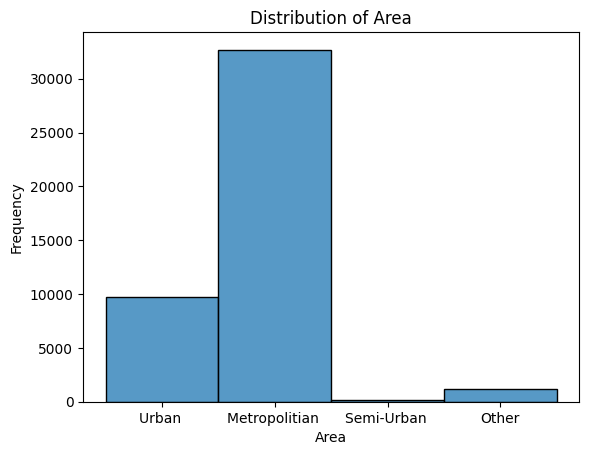

In [26]:
 sns.histplot(data=df_data,x='Area')
 plt.title('Distribution of Area')
 plt.xlabel('Area')
 plt.ylabel('Frequency')
 plt.show()


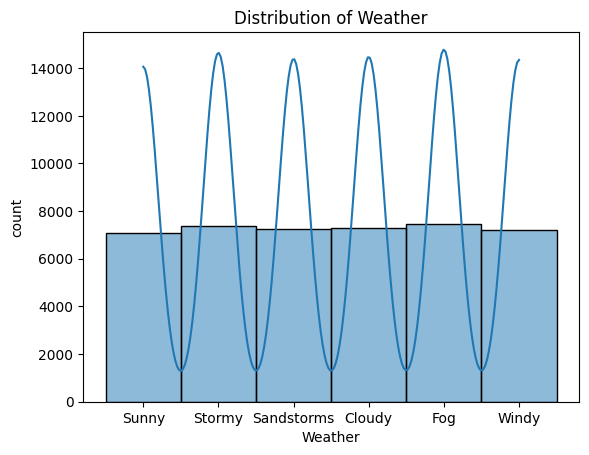

In [27]:
sns.histplot(data=df_data, x='Weather', kde=True)
plt.title('Distribution of Weather')
plt.xlabel('Weather')
plt.ylabel('count')
plt.show()

In [28]:
#df_data.columns

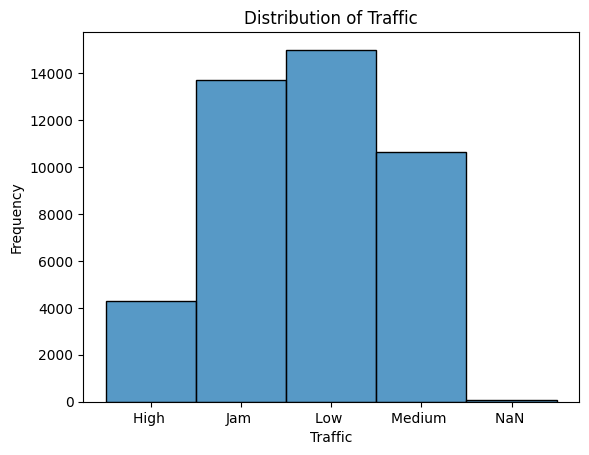

In [29]:
sns.histplot(data=df_data, x='Traffic')
plt.title('Distribution of Traffic')
plt.xlabel('Traffic')
plt.ylabel('Frequency')
plt.show()

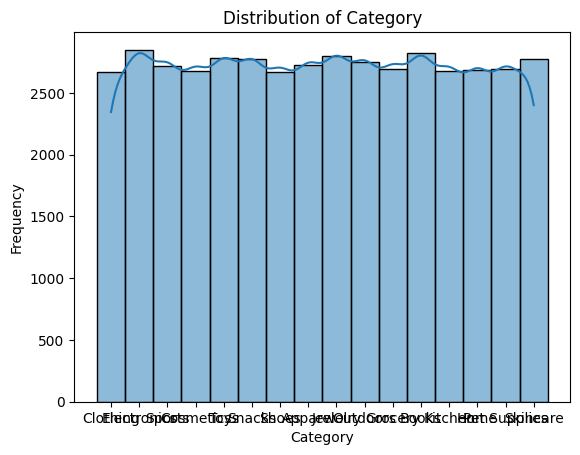

In [30]:
sns.histplot(data=df_data, x='Category', kde=True)
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

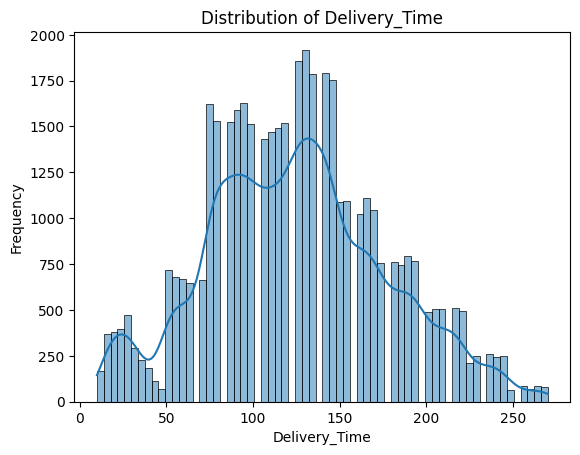

In [33]:
sns.histplot(data=df_data, x='Delivery_Time', kde=True)
plt.title('Distribution of Delivery_Time')
plt.xlabel('Delivery_Time')
plt.ylabel('Frequency')
plt.show()

In [34]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


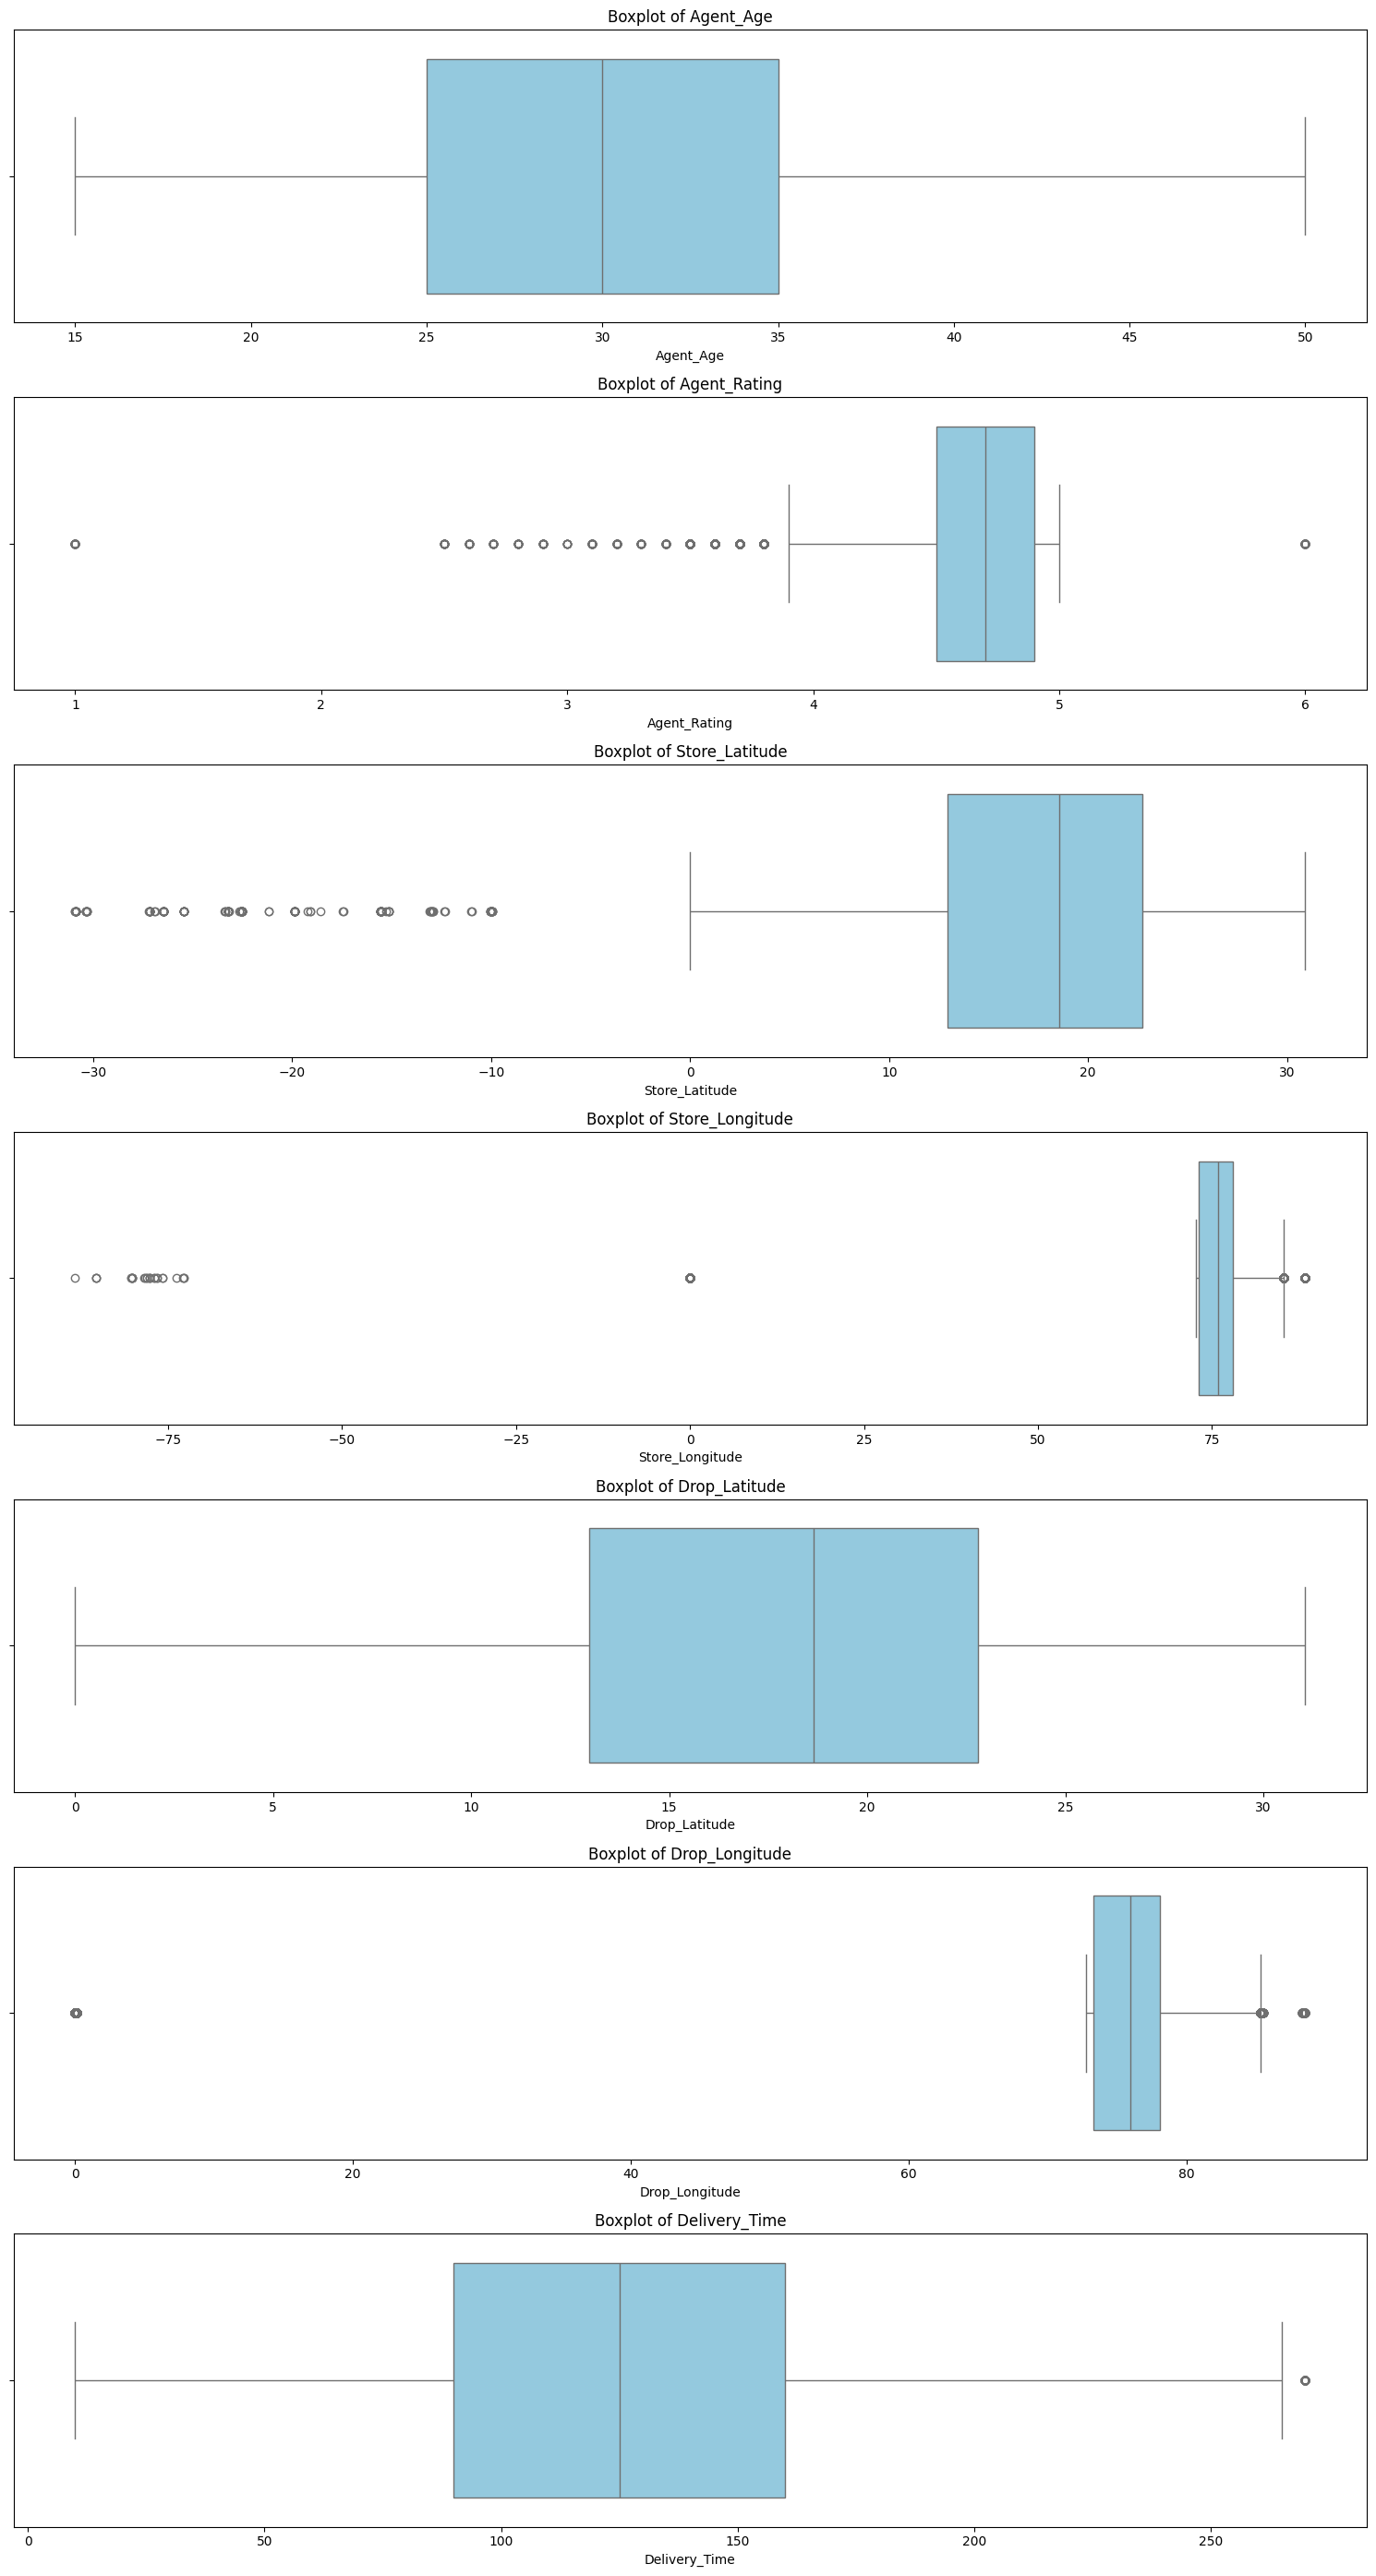

In [43]:
numerical_cols = df_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1 , i)
    sns.boxplot(x=df_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
plt.tight_layout()
plt.show()

In [44]:
numerical_cols

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time'],
      dtype='object')

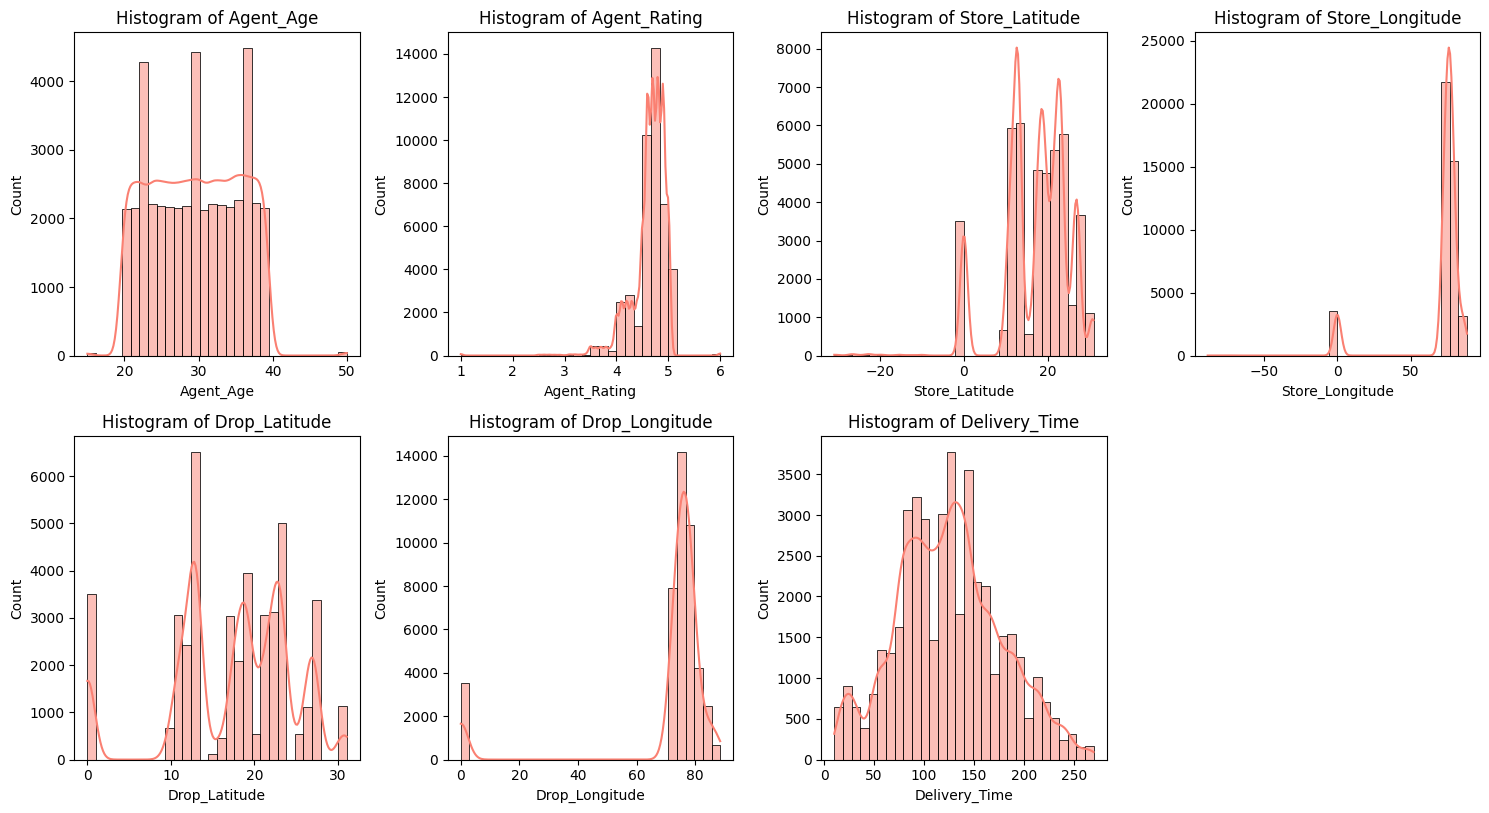

In [45]:
plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 4, i)
    sns.histplot(df_data[col], kde=True, bins=30, color='salmon')
    plt.title(f'Histogram of {col}', fontsize=12)
plt.tight_layout()
plt.show()

In [49]:
skewed_features = df_data.drop('Vehicle', axis=1).skew().sort_values(ascending=False)
print(skewed_features)

Delivery_Time      0.188628
Agent_Age          0.018669
Drop_Latitude     -0.700228
Store_Latitude    -1.104543
Agent_Rating      -2.493552
Drop_Longitude    -2.949822
Store_Longitude   -3.013808
Order_ID                NaN
Order_Date              NaN
Order_Time              NaN
Pickup_Time             NaN
Weather                 NaN
Traffic                 NaN
Area                    NaN
Category                NaN
dtype: float64


In [50]:
skewed_cols = [
        'Delivery_Time', 'Agent_Time' , 'Drop_Latitude' ,  'Store_Latitude', 'Agent_Rating'
         'Drop_Longitude', 'Store_Longitude', 'Order_ID', 'Order_Date',
     ]


In [51]:
def cap_outliers_irq(df_data, columns):
    for col in columns:
        Q1 = df_data[col].quantile(0.25)
        Q3 = df_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper =Q3 + 1.5  * IQR

        df_data[col] = np.where(df_data[col] < lower, lower, df_data[col])
        df_data[col] = np.where(df_data[col] > upper, upper, df_data[col])


In [55]:
df_data

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,NaN,37,4.9,22.745049,75.892471,22.765049,75.912471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN
1,NaN,34,4.5,12.913041,77.683237,13.043041,77.813237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165,NaN
2,NaN,23,4.4,12.914264,77.678400,12.924264,77.688400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
3,NaN,38,4.7,11.003669,76.976494,11.053669,77.026494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
4,NaN,32,4.6,12.972793,80.249982,13.012793,80.289982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,NaN,30,4.8,26.902328,75.794257,26.912328,75.804257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN
43735,NaN,21,4.6,0.000000,0.000000,0.070000,0.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,NaN
43736,NaN,30,4.9,13.022394,80.242439,13.052394,80.272439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,NaN
43737,NaN,20,4.7,11.001753,76.986241,11.041753,77.026241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN


In [56]:
df_data

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,NaN,37,4.9,22.745049,75.892471,22.765049,75.912471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN
1,NaN,34,4.5,12.913041,77.683237,13.043041,77.813237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165,NaN
2,NaN,23,4.4,12.914264,77.678400,12.924264,77.688400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
3,NaN,38,4.7,11.003669,76.976494,11.053669,77.026494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
4,NaN,32,4.6,12.972793,80.249982,13.012793,80.289982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,NaN,30,4.8,26.902328,75.794257,26.912328,75.804257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN
43735,NaN,21,4.6,0.000000,0.000000,0.070000,0.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,NaN
43736,NaN,30,4.9,13.022394,80.242439,13.052394,80.272439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,NaN
43737,NaN,20,4.7,11.001753,76.986241,11.041753,77.026241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
